In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


In [3]:
file_path = "../results/responder/insertion_deletion_ensemble.pkl"

results = pkl.load(open(file_path,'rb'))

In [4]:
def normalize_data(data):

    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

    return normalized_data


explainers = [
    "integrated_gradients", 
    "shapley_value_sampling", 
    "naive_shap"
]

plt.figure(figsize=(20,6))

for exp_index, exp in enumerate(explainers):
    
    insertion_results = normalize_data(results[exp_index][2])
    deletion_results = normalize_data(results[exp_index][3])
    
    features_num = insertion_results.shape[0]
    plt.subplot(1,2,1)

    plt.plot([i for i in range(features_num)], insertion_results,'-o', markersize=4,label=exp)
    plt.title("insertion")
    
    plt.subplot(1,2,2)
    plt.plot([i for i in range(features_num)], deletion_results,'-o',markersize=4, label= exp)
    plt.title("deletion")
    
plt.legend(bbox_to_anchor=(1.5, 1), prop={'size': 15 })

TypeError: unsupported operand type(s) for -: 'dict' and 'dict'

<Figure size 1440x432 with 0 Axes>

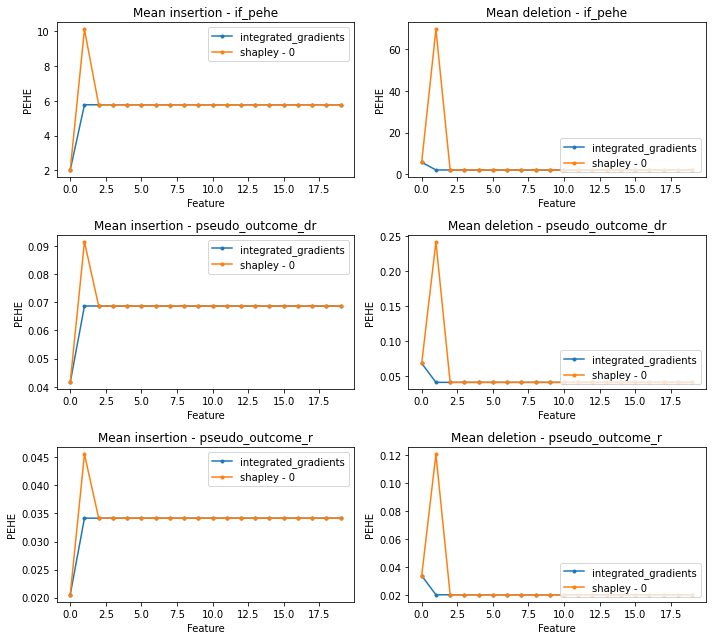

In [40]:
explainers = [
    "integrated_gradients", 
    "shapley_value_sampling",
    # "naive_shap"
]

selection_types = [ 
    "if_pehe",
    "pseudo_outcome_dr", 
    "pseudo_outcome_r"
]

# Initialize dictionaries to store all results
insertion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}
deletion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}

# Loop over the different files
for file_num in range(1):  # assuming there are 5 files, from 0 to 4
    
    if file_num not in [1]:
        
        for selection_type in selection_types:
            file_path = f"../results/ist3/insertion_deletion_ensemble.pkl"
            results = pkl.load(open(file_path,'rb'))

            for exp_index, exp in enumerate(explainers):
                insertion_results_all[exp][selection_type].append((results[exp_index][2][selection_type]))
                deletion_results_all[exp][selection_type].append((results[exp_index][3][selection_type]))

fig, axs = plt.subplots(len(selection_types), 2, figsize=(10, 3*len(selection_types)))

# Calculate and plot mean results

for i, selection_type in enumerate(selection_types):
    for exp in explainers:
        
        if exp == "shapley_value_sampling":
            label = "shapley - 0"
        elif exp == "naive_shap":
            label = "shapley - marginal"
        else:
            label = exp
        
        insertion_results_mean = np.mean(insertion_results_all[exp][selection_type], axis=0)
        insertion_results_std = np.std(insertion_results_all[exp][selection_type], axis=0)

        deletion_results_mean = np.mean(deletion_results_all[exp][selection_type], axis=0)
        deletion_results_std = np.std(deletion_results_all[exp][selection_type], axis=0)

        features_num = len(insertion_results_mean)

        axs[i, 0].plot([j for j in range(features_num)],
                 insertion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')

        axs[i, 0].set_title(f"Mean insertion - {selection_type}")
        axs[i, 0].set_xlabel('Feature')
        axs[i, 0].set_ylabel('PEHE')

        axs[i, 1].plot([j for j in range(features_num)],
                 deletion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')
        
        axs[i, 1].set_title(f"Mean deletion - {selection_type}")
        axs[i, 1].set_xlabel('Feature')
        axs[i, 1].set_ylabel('PEHE')
        
        axs[i, 0].legend(loc='upper right')
        axs[i, 1].legend(loc='lower right')
        
plt.tight_layout()
plt.show()

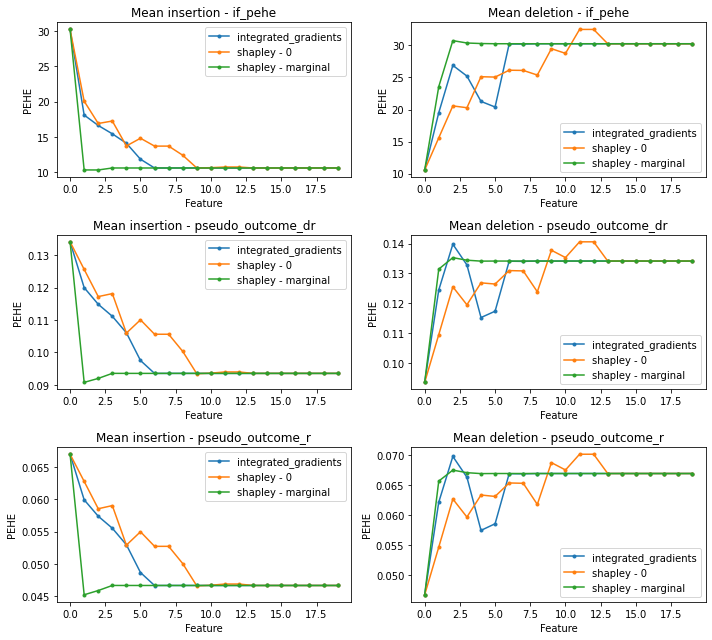

In [35]:
explainers = [
    "integrated_gradients", 
    "shapley_value_sampling",
    "naive_shap"
]

selection_types = [ 
    "if_pehe",
    "pseudo_outcome_dr", 
    "pseudo_outcome_r"
]

# Initialize dictionaries to store all results
insertion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}
deletion_results_all = {exp: {sel: [] for sel in selection_types} for exp in explainers}

# Loop over the different files
for file_num in range(10):  # assuming there are 5 files, from 0 to 4
    
    if file_num not in [1]:
        
        for selection_type in selection_types:
            file_path = f"../results/ist3/insertion_deletion_xlearner_{file_num}.pkl"
            results = pkl.load(open(file_path,'rb'))

            for exp_index, exp in enumerate(explainers):
                insertion_results_all[exp][selection_type].append((results[exp_index][2][selection_type]))
                deletion_results_all[exp][selection_type].append((results[exp_index][3][selection_type]))

fig, axs = plt.subplots(len(selection_types), 2, figsize=(10, 3*len(selection_types)))

# Calculate and plot mean results

for i, selection_type in enumerate(selection_types):
    for exp in explainers:
        
        if exp == "shapley_value_sampling":
            label = "shapley - 0"
        elif exp == "naive_shap":
            label = "shapley - marginal"
        else:
            label = exp
        
        insertion_results_mean = np.mean(insertion_results_all[exp][selection_type], axis=0)
        insertion_results_std = np.std(insertion_results_all[exp][selection_type], axis=0)

        deletion_results_mean = np.mean(deletion_results_all[exp][selection_type], axis=0)
        deletion_results_std = np.std(deletion_results_all[exp][selection_type], axis=0)

        features_num = len(insertion_results_mean)

        axs[i, 0].plot([j for j in range(features_num)],
                 insertion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')

        axs[i, 0].set_title(f"Mean insertion - {selection_type}")
        axs[i, 0].set_xlabel('Feature')
        axs[i, 0].set_ylabel('PEHE')

        axs[i, 1].plot([j for j in range(features_num)],
                 deletion_results_mean,
                 '-o',
                 markersize=3,
                 label=f'{label}')
        
        axs[i, 1].set_title(f"Mean deletion - {selection_type}")
        axs[i, 1].set_xlabel('Feature')
        axs[i, 1].set_ylabel('PEHE')
        
        axs[i, 0].legend(loc='upper right')
        axs[i, 1].legend(loc='lower right')
        
plt.tight_layout()
plt.show()